# 📊 Notebook 1: Descriptive Statistics & Data Overview

**Project:** Telco Customer Churn Analysis  
**Goal:** Understand the dataset structure, data quality, and basic feature distributions.

---

## 1. Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
try:
    df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: Data file not found. Please check data/raw directory.")

df.head()

Dataset loaded: 7043 rows, 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Cleaning & Preprocessing

### Check Data Types & Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation:** `TotalCharges` is object type but should be numeric. This typically happens when there are empty strings ' '.

In [4]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for nulls
null_count = df['TotalCharges'].isnull().sum()
print(f"Missing TotalCharges: {null_count} ({null_count/len(df):.4%})")

# Inspect rows with missing TotalCharges
df[df['TotalCharges'].isnull()]

Missing TotalCharges: 11 (0.1562%)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Insight:** The missing values correspond to customers with `tenure = 0`. These are brand new customers who haven't been billed yet. We can fill these with 0.

In [5]:
df['TotalCharges'].fillna(0, inplace=True)
print("Missing values handled.")

Missing values handled.


### Convert Churn to Numeric
For statistical analysis, it's often helpful to have a numeric target (0/1).

In [6]:
df['Churn_Numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Churn_Numeric column created.")

Churn_Numeric column created.


## 4. Descriptive Statistics

### Target Variable: Churn Rate

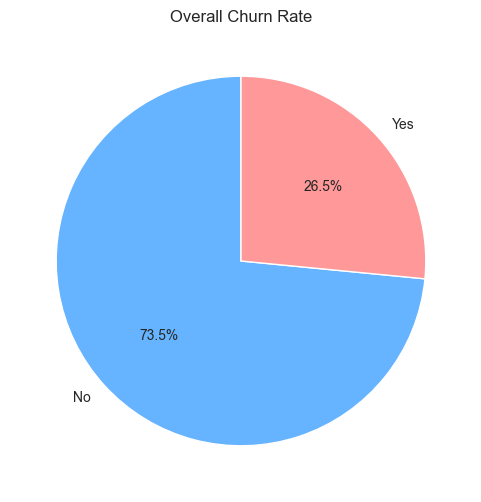

Churn Rate: 26.54%
Total Churned Customers: 1869


In [7]:
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Overall Churn Rate')
plt.show()

print(f"Churn Rate: {df['Churn_Numeric'].mean():.2%}")
print(f"Total Churned Customers: {df['Churn_Numeric'].sum()}")

### Numerical Features
Analyzing `tenure`, `MonthlyCharges`, and `TotalCharges`.

In [8]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


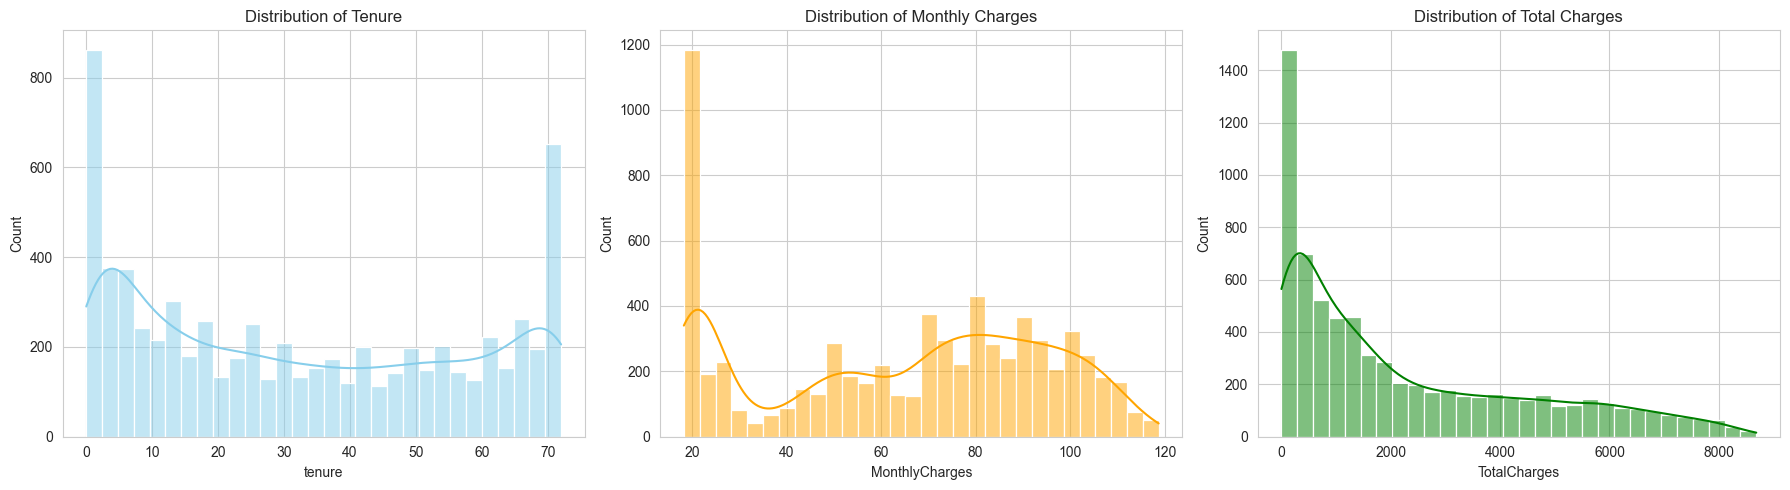

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x='tenure', bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Tenure')

sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Monthly Charges')

sns.histplot(data=df, x='TotalCharges', bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

**Observations:**
- **Tenure:** Bimodal distribution. Lots of new customers (< 5 months) and lots of loyal customers (70+ months).
- **Monthly Charges:** Peak at low end (likely DSL/no-internet) and high end (Fiber + extras).
- **Total Charges:** Right-skewed, typical of financial data.

### Categorical Features

In [10]:
cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 
        'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']
# Note: column names in dataset are lowercase/mixed. Let's verify names.
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')


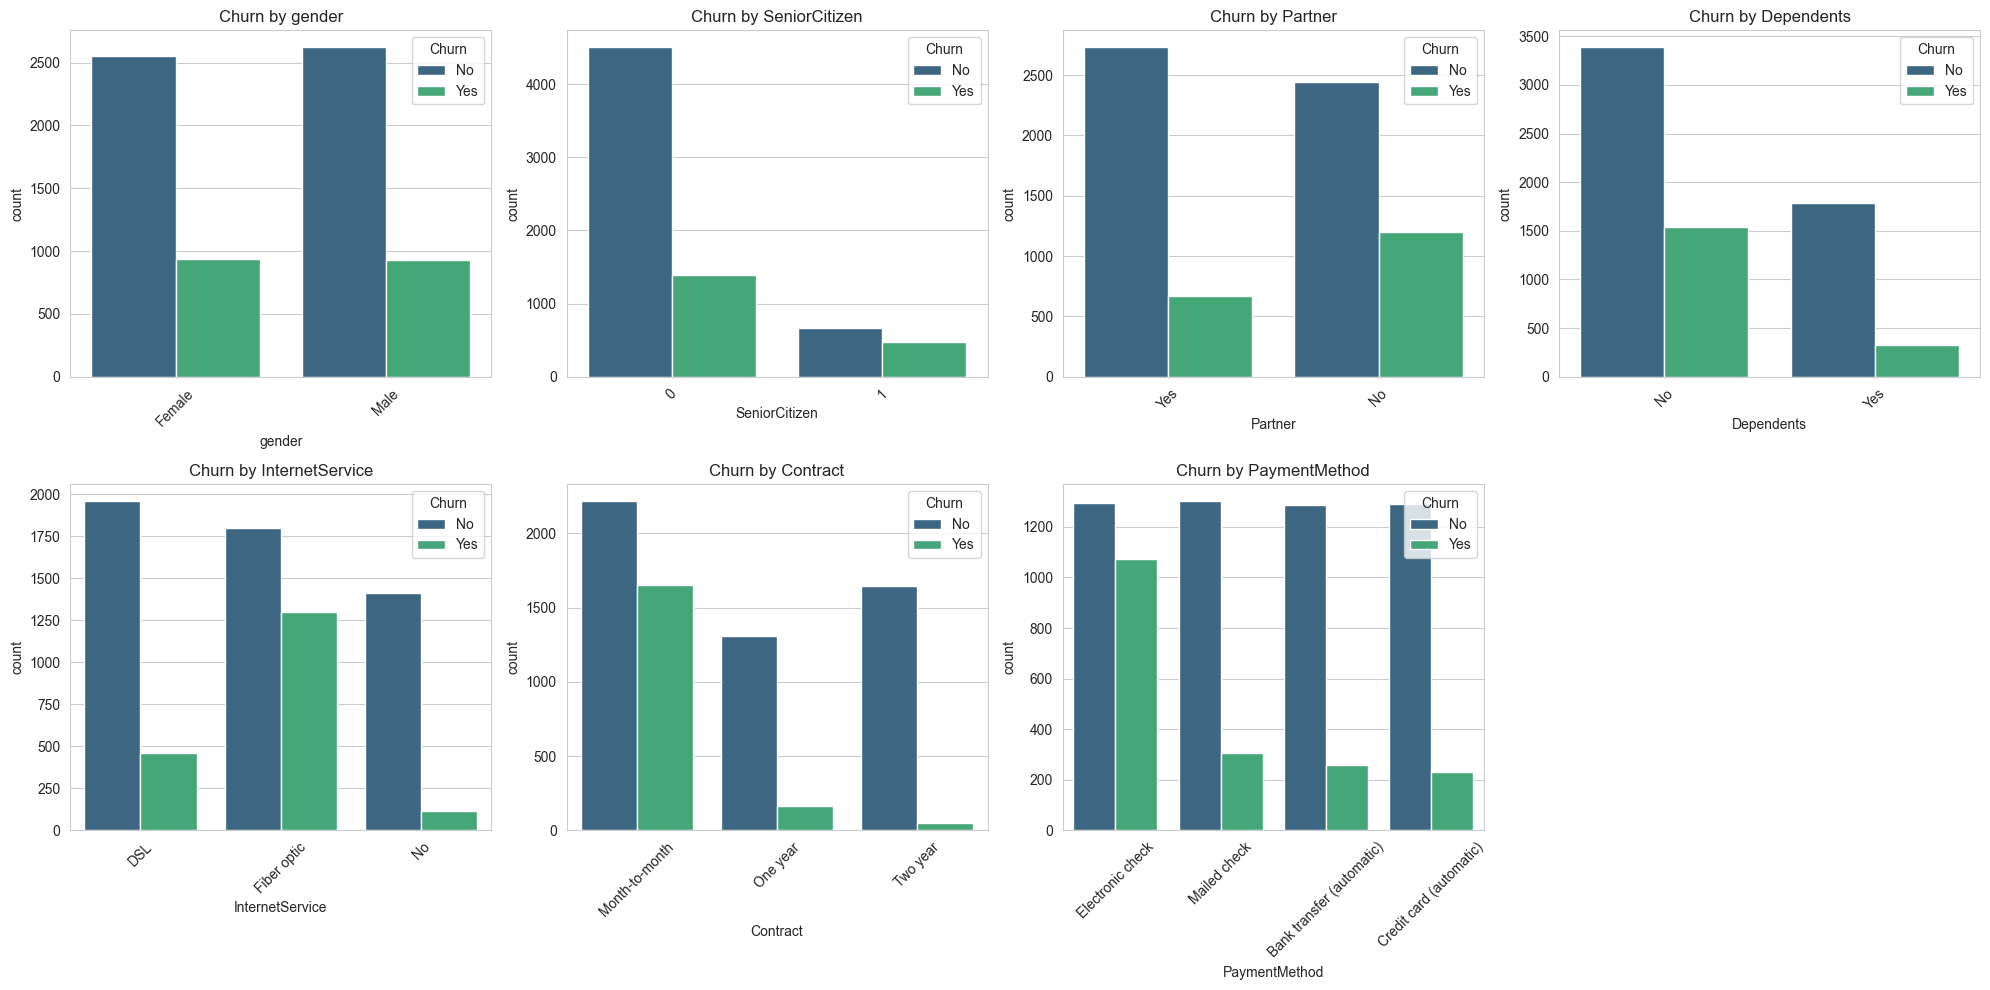

In [11]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
            'InternetService', 'Contract', 'PaymentMethod']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=45)
    
# Remove empty subplot
if len(cat_cols) < 8:
    fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

## 5. Key Initial Findings

From the descriptive analysis, we can already spot high-risk groups:

1. **Contract Type:** Month-to-month customers have a **much higher** churn rate compared to 1-year or 2-year contracts.
2. **Internet Service:** Fiber optic customers appear to churn more than DSL or No Internet.
3. **Payment Method:** Electronic check users show higher churn.
4. **Senior Citizens:** Seem to have a higher churn ratio.
5. **Tenure:** New customers are the most vulnerable to churn.

## 6. Save Processed Data

In [12]:
# Save cleaned dataframe for next notebooks
df.to_csv('../data/processed/telco_churn_cleaned.csv', index=False)
print("Cleaned dataset saved as 'telco_churn_cleaned.csv'")

Cleaned dataset saved as 'telco_churn_cleaned.csv'
